## 1. Implement hàm tính convolution, input X,W, stride, padding, output Y

In [ ]:
import numpy as np

In [ ]:
def zero_pad(X,pad):
    X_pad=np.pad(X,((pad,pad),(pad,pad),(0,0)),'constant',constant_values=0)
    return X_pad

In [ ]:
def conv_single_step(a_slice_prev,W,b):
    """
    a_slice_prev --slice of input data of shape (f,f,n_C_prev)
    W -- Weight parameter - matrix of shape (f,f,n_C_prev)
    b -- bias paramter -matrix of shape (1,1,1)
    """
    s=np.multiply(a_slice_prev,W)+b
    return np.sum(s)

In [ ]:
def conv_forward(X,W,b,stride, padding):
    """
    Arguments:
    X -- Matrix shape of (n_H_prev,n_W_prev,n_C_prev)
    W -- Weight parameter - matrix of shape (f,f,n_C_prev,n_C)
    b -- bias paramter -matrix of shape (1,1,1,n_C)
    
    Return:
    Y -- Matrix of X convolution W
    """
    (n_H_prev,n_W_prev,n_C_prev)=X.shape
    (f,f,n_C_prev,n_C)=W.shape
    
    n_H=int((n_H_prev+2*padding-f)/stride)+1
    n_W=int((n_W_prev+2*padding-f)/stride)+1
    
    Y=np.zeros((n_H,n_W,n_C))
    
    # Create X_pad by padding X
    X_pad=zero_pad(X,padding)
    
    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start=h*stride
                vert_end=vert_start+f
                
                horiz_start=w*stride
                horiz_end=horiz_start+f
                
                x_slice=X_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                
                Y[h,w,c]=conv_single_step(x_slice,W[:,:,:,c],b[:,:,:,c])
                
    return Y
    
    

In [ ]:
import matplotlib.pyplot as plt
image_data=plt.imread('dog.jpg')


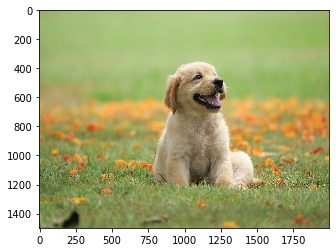

In [ ]:
# show original image
plt.imshow(image_data)

In [ ]:
# edge detection
W=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
W=np.array([W for _ in range(3)])
B=np.zeros((3,3,3,3))
B[...,0]=W
B[...,1]=W
B[...,2]=W
W=B
b=np.zeros((1,1,1,3))


e_image=conv_forward(image_data,W,b,stride=1,padding=1)

In [ ]:
#normalize 
for c in range(3):
    e_image[:,:,c]=(e_image[:,:,c]-np.min(e_image[:,:,c]))/(np.max(e_image[:,:,c])-np.min(e_image[:,:,c]))
e_image=(e_image*255).astype(int)

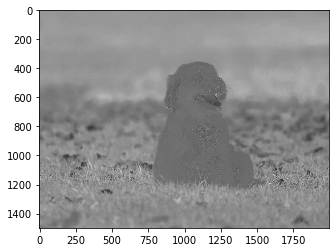

In [ ]:
plt.imshow(e_image)

## 2.Implement hàm sobel

### 2.1 Dùng hàm tự viết

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
image=cv2.imread('gach.jpg')

In [ ]:
def sobel(src,dx,dy,ksize=3):
    """
    ouput -- matrix shape of (n_H,n_D,1)
    """
    # Gauss filter
    image=cv2.GaussianBlur(src,(3,3),0)
    
    #Convert to gray image
    gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #reshape
    gray_image=gray_image.reshape((gray_image.shape[0],gray_image.shape[1],-1))

    if dx==1 and dy==0:
        #sobel_X
        W=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        W=W.reshape((3,3,-1))
        B=np.zeros((3,3,1,1))
        B[...,0]=W
        W=B
        b=np.zeros((1,1,1,1))

        sobel_x=conv_forward(gray_image,W,b,stride=1,padding=1)
        return sobel_x
    elif dx==0 and dy==1:
        #sobel_y
        W=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        W=W.reshape((3,3,-1))
        B=np.zeros((3,3,1,1))
        B[...,0]=W
        W=B
        b=np.zeros((1,1,1,1))

        sobel_y=conv_forward(gray_image,W,b,stride=1,padding=1)
        return sobel_y
    else:
        print( "Invalid parameter")
        
        
    

In [ ]:
origin_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
sobel_x=sobel(image,1,0)
sobel_y=sobel(image,0,1)
sobel=np.sqrt(sobel_x**2+sobel_y**2)

In [ ]:
#normalize
sobel_x=sobel_x.reshape((sobel_x.shape[0],sobel_x.shape[1]))
sobel_x=(sobel_x-np.min(sobel_x))/(np.max(sobel_x)-np.min(sobel_x))
sobel_x=(sobel_x*255).astype(int)


sobel_y=sobel_y.reshape((sobel_y.shape[0],sobel_y.shape[1]))
sobel_y=(sobel_y-np.min(sobel_y))/(np.max(sobel_y)-np.min(sobel_y))
sobel_y=(sobel_y*255).astype(int)

sobel=sobel.reshape((sobel.shape[0],sobel.shape[1]))
sobel=(sobel-np.min(sobel))/(np.max(sobel)-np.min(sobel))
sobel=(sobel*255).astype(int)

In [ ]:
# Convert 2D image to 3D image by duplicate 3 times 
mask=np.zeros((sobel_x.shape[0],sobel_y.shape[1],3))
for i in range(3):
    mask[:,:,i]=sobel_x
    
sobel_x=mask.astype(int)

mask=np.zeros((sobel_y.shape[0],sobel_y.shape[1],3))
for i in range(3):
    mask[:,:,i]=sobel_y
    
sobel_y=mask.astype(int)

mask=np.zeros((sobel.shape[0],sobel.shape[1],3))
for i in range(3):
    mask[:,:,i]=sobel
    
sobel=mask.astype(int)

Text(0.5, 1.0, 'sobel')

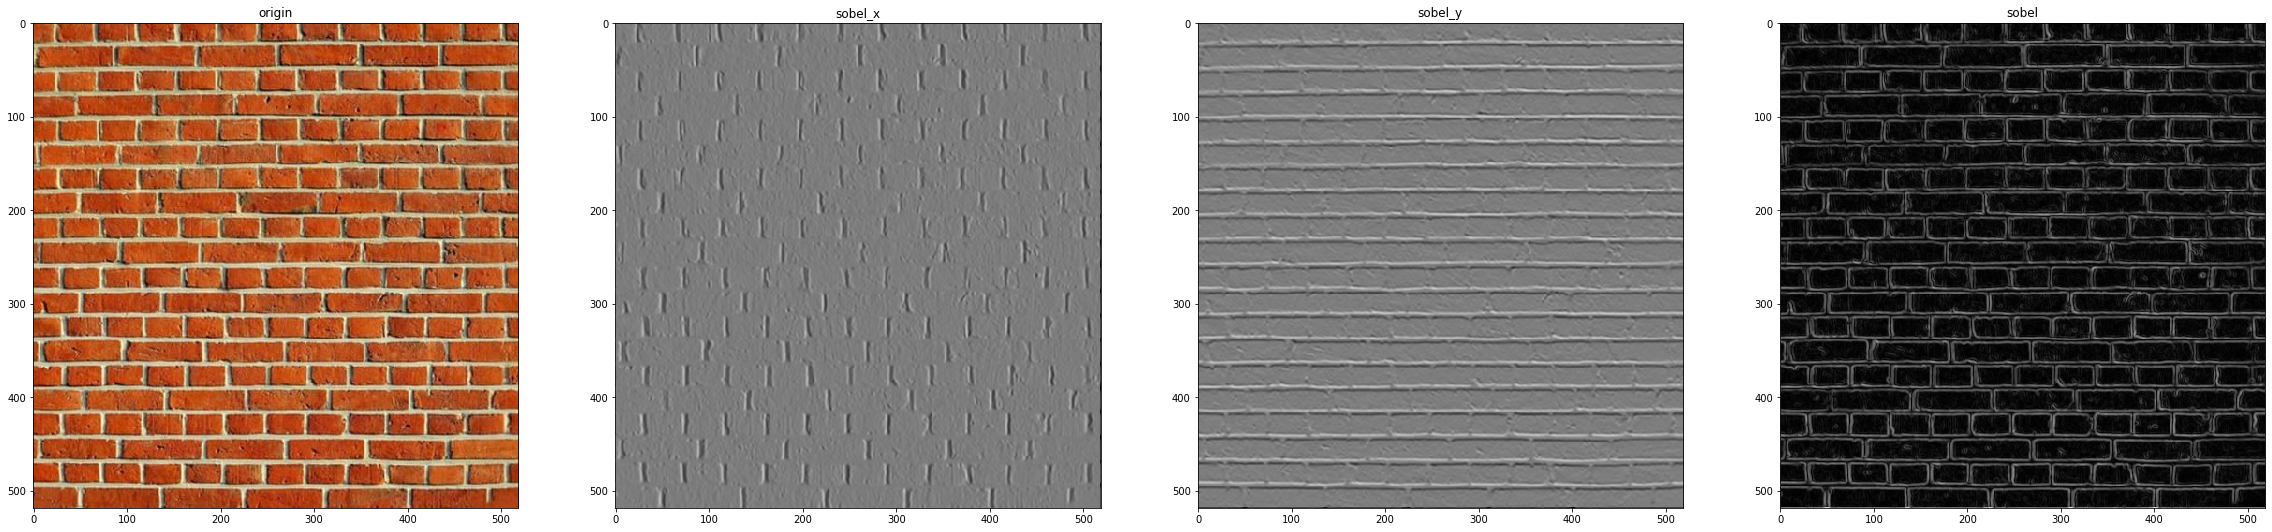

In [ ]:
f,axes=plt.subplots(1,4,figsize=(40,10))
axes[0].imshow(origin_image)
axes[0].set_title('origin')
axes[1].imshow(sobel_x)
axes[1].set_title('sobel_x')
axes[2].imshow(sobel_y)
axes[2].set_title('sobel_y')
axes[3].imshow(sobel)
axes[3].set_title('sobel')

### 2.2 Dùng OpenCV

In [ ]:
import cv2
img=cv2.imread('gach.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
sobel_x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobel=np.sqrt(sobel_x**2+sobel_y**2)


In [ ]:
for c in range(3):
    sobel_x[:,:,c]=(sobel_x[:,:,c]-np.min(sobel_x[:,:,c]))/(np.max(sobel_x[:,:,c])-np.min(sobel_x[:,:,c]))
sobel_x=(sobel_x*255).astype(int)

for c in range(3):
    sobel_y[:,:,c]=(sobel_y[:,:,c]-np.min(sobel_y[:,:,c]))/(np.max(sobel_y[:,:,c])-np.min(sobel_y[:,:,c]))
sobel_y=(sobel_y*255).astype(int)

for c in range(3):
    sobel[:,:,c]=(sobel[:,:,c]-np.min(sobel[:,:,c]))/(np.max(sobel[:,:,c])-np.min(sobel[:,:,c]))
sobel=(sobel*255).astype(int)

Text(0.5, 1.0, 'sobel')

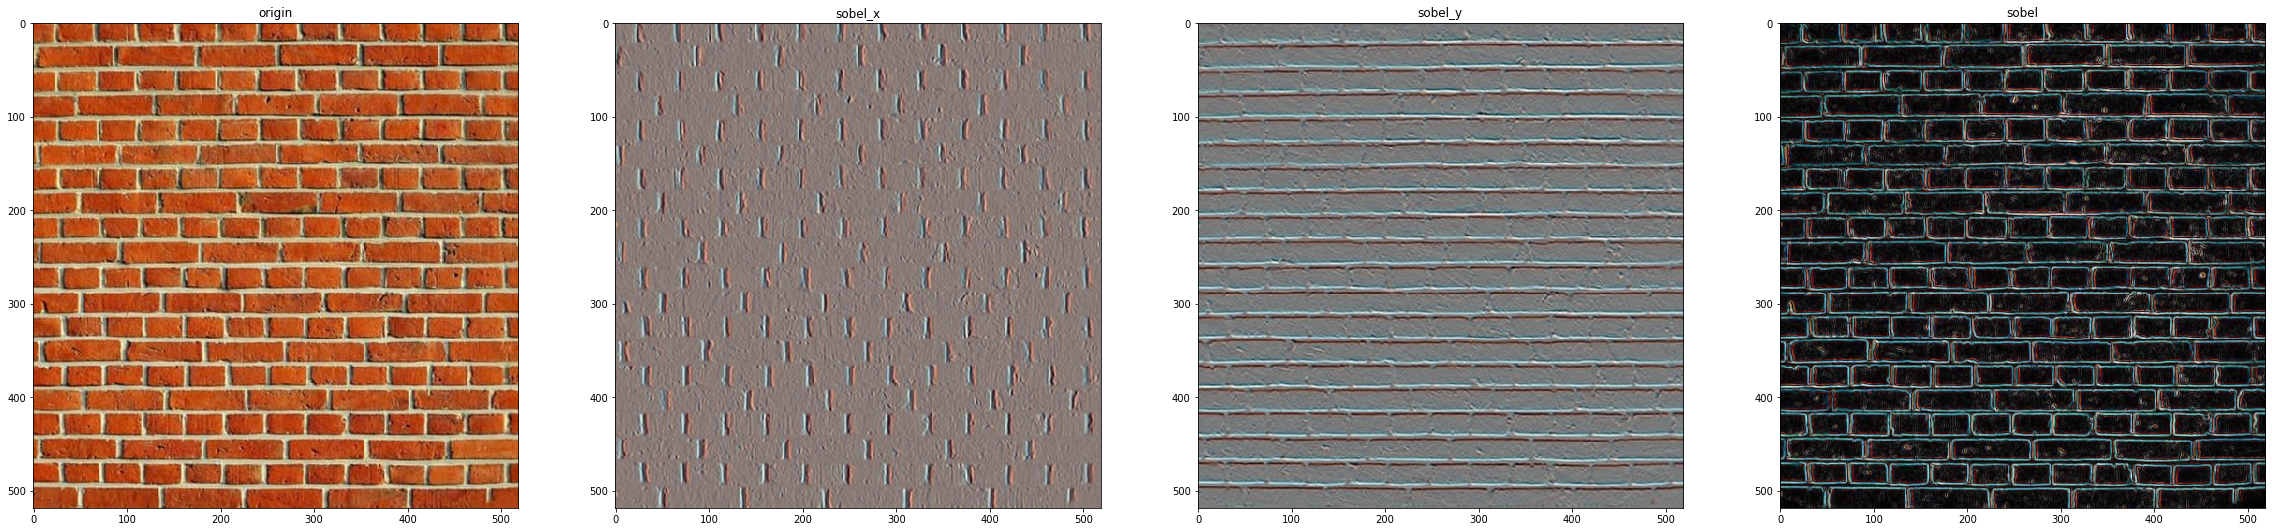

In [ ]:
f,axes=plt.subplots(1,4,figsize=(40,10))
axes[0].imshow(img)
axes[0].set_title('origin')
axes[1].imshow(sobel_x)
axes[1].set_title('sobel_x')
axes[2].imshow(sobel_y)
axes[2].set_title('sobel_y')
axes[3].imshow(sobel)
axes[3].set_title('sobel')

## 3. Hiểu code mẫu, chỉnh hyper như lr, optimizer, kernel size, số kernels,... So sánh các kết quả

In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
import tensorflow

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

print(X_val.shape)

(50000, 28, 28)
(10000, 28, 28)


In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)

(50000, 28, 28, 1)


In [ ]:
class Model_CNN():
    def __init__(self,input_shape, learning_rate, optimizer, kernels):
        self.input_shape=input_shape
        self.learning_rate=learning_rate
        self.optimizer=optimizer
        self.kernels=kernels
        self.model=self.build()
        
    def build(self):
        model=Sequential()
        model.add(Conv2D(self.kernels[0][0],(self.kernels[0][1],self.kernels[0][1]),padding='same',activation='relu',input_shape=self.input_shape))
        
        model.add(Conv2D(self.kernels[1][0],(self.kernels[1][1],self.kernels[1][1]),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Flatten())
        model.add(Dense(128,activation='relu'))
        model.add(Dense(10,activation='softmax'))
        if self.optimizer=='adam':
            model.compile(loss='sparse_categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(self.learning_rate),metrics=['accuracy'])
        else:
            model.compile(loss='sparse_categorical_crossentropy',optimizer=tensorflow.keras.optimizers.SGD(self.learning_rate),metrics=['accuracy'])
        return model

### 3.1 Chỉnh learning_rate

In [ ]:
models={}
#r=-3*np.random.rand(4)-1
lr=[1e-1,1e-2,1e-3,1e-4]
input_shape=(28,28,1)

In [ ]:
lr

[0.1, 0.01, 0.001, 0.0001]

In [ ]:
for i in range(len(lr)):
    models['model'+str(i+1)]=Model_CNN(input_shape,lr[i],'adam',[[32,3],[32,3]]).model

In [ ]:
history={}
for i in range(len(lr)):
    history['H'+str(i)]=models['model'+str(i+1)].fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.7743 - accuracy: 0.1013 - val_loss: 2.3149 - val_accuracy: 0.1064
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3146 - accuracy: 0.1035 - val_loss: 2.3085 - val_accuracy: 0.1064
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3136 - accuracy: 0.1028 - val_loss: 2.3210 - val_accuracy: 0.1064
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3139 - accuracy: 0.1047 - val_loss: 2.3255 - val_accuracy: 0.1064
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3139 - accuracy: 0.1041 - val_loss: 2.3178 - val_accuracy: 0.1090
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3140 - accuracy: 0.1007 - val_loss: 2.3182 - val_accuracy: 0.1064
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3137 - accuracy: 0.1061 - val_loss: 2.3123 - val_accuracy:

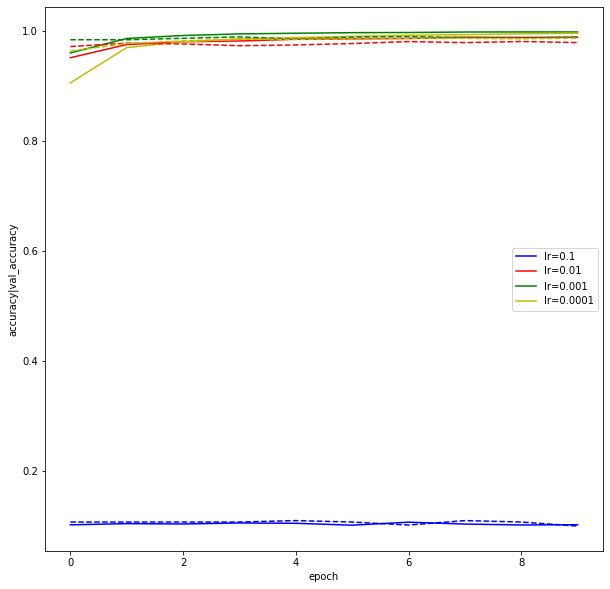

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history['H0'].history['accuracy'],'b',label='lr='+str(lr[0]))
plt.plot(history['H1'].history['accuracy'],'r',label='lr='+str(lr[1]))
plt.plot(history['H2'].history['accuracy'],'g',label='lr='+str(lr[2]))
plt.plot(history['H3'].history['accuracy'],'y',label='lr='+str(lr[3]))

plt.plot(history['H0'].history['val_accuracy'],'--b')
plt.plot(history['H1'].history['val_accuracy'],'--r')
plt.plot(history['H2'].history['val_accuracy'],'--g')
plt.plot(history['H3'].history['val_accuracy'],'--y')
plt.xlabel('epoch')
plt.ylabel('accuracy|val_accuracy')
plt.legend()



In [ ]:
for i in range(len(lr)):
    print("lr= {}, val_accuracy: {:f},accuracy:{:f} \n".format(lr[i],history['H'+str(i)].history['val_accuracy'][-1],history['H'+str(i)].history['accuracy'][-1]))

lr= 0.1, val_accuracy: 0.099000,accuracy:0.101460 

lr= 0.01, val_accuracy: 0.978800,accuracy:0.988500 

lr= 0.001, val_accuracy: 0.988800,accuracy:0.998080 

lr= 0.0001, val_accuracy: 0.986900,accuracy:0.995780 



### 3.2 Chỉnh optimizer, dùng SGD

In [ ]:
models_sgd={}
#r=-3*np.random.rand(4)-1
lr=[1e-1,1e-2,1e-3,1e-4]
input_shape=(28,28,1)

In [ ]:
for i in range(len(lr)):
    models_sgd['model'+str(i+1)]=Model_CNN(input_shape,lr[i],'sgd',[[32,3],[32,3]]).model

In [ ]:
history_sgd={}
for i in range(len(lr)):
    history_sgd['H'+str(i)]=models_sgd['model'+str(i+1)].fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 7.9849e-04 - accuracy: 0.9998 - val_loss: 0.0537 - val_accuracy: 0.9903
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 6.7153e-04 - accuracy: 0.9999 - val_loss: 0.0576 - val_accuracy: 0.9902
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7486e-04 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9901
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3704e-04 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9907
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 7.0817e-05 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9910
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 5.5687e-05 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9911
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.7677e-05 - accuracy: 1.0000 - val_

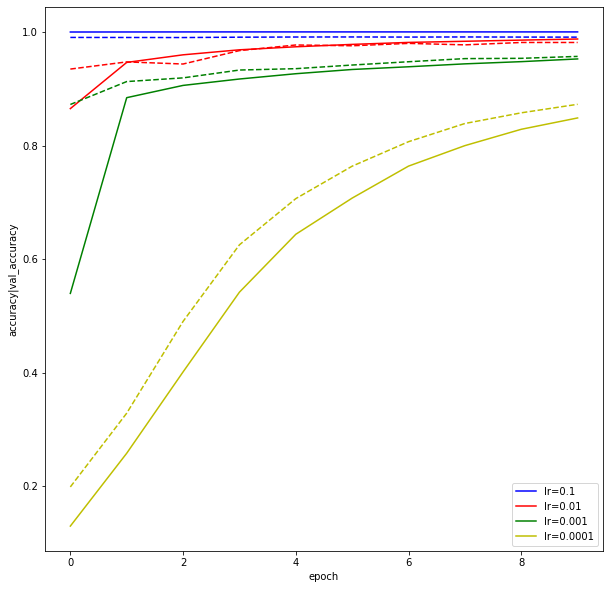

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history_sgd['H0'].history['accuracy'],'b',label='lr='+str(lr[0]))
plt.plot(history_sgd['H1'].history['accuracy'],'r',label='lr='+str(lr[1]))
plt.plot(history_sgd['H2'].history['accuracy'],'g',label='lr='+str(lr[2]))
plt.plot(history_sgd['H3'].history['accuracy'],'y',label='lr='+str(lr[3]))

plt.plot(history_sgd['H0'].history['val_accuracy'],'--b')
plt.plot(history_sgd['H1'].history['val_accuracy'],'--r')
plt.plot(history_sgd['H2'].history['val_accuracy'],'--g')
plt.plot(history_sgd['H3'].history['val_accuracy'],'--y')
plt.xlabel('epoch')
plt.ylabel('accuracy|val_accuracy')
plt.legend()



In [ ]:

print("Dung Optimizer SGD:")
for i in range(len(lr)):
    print("lr= {}, val_accuracy: {:f},accuracy:{:f} \n".format(lr[i],history_sgd['H'+str(i)].history['val_accuracy'][-1],history_sgd['H'+str(i)].history['accuracy'][-1]))

Dung Optimizer SGD:
lr= 0.1, val_accuracy: 0.990800,accuracy:1.000000 

lr= 0.01, val_accuracy: 0.981400,accuracy:0.987500 

lr= 0.001, val_accuracy: 0.956900,accuracy:0.952440 

lr= 0.0001, val_accuracy: 0.872600,accuracy:0.848580 



### 3.3 Chỉnh kernel_size

In [ ]:
# kernel 3*3
model_1=Model_CNN(input_shape,0.1,'sgd',[[32,3],[32,3]]).model

# kernel 5*5
model_2=Model_CNN(input_shape,0.1,'sgd',[[32,5],[32,5]]).model
# kernel 7*7
model_3=Model_CNN(input_shape,0.1,'sgd',[[32,7],[32,7]]).model


In [ ]:
H1=model_1.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1872 - accuracy: 0.9413 - val_loss: 0.0686 - val_accuracy: 0.9786
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0541 - val_accuracy: 0.9841
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0549 - val_accuracy: 0.9833
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0490 - val_accuracy: 0.9865
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0479 - val_accuracy: 0.9882
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0449 - val_accuracy: 0.9872
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0445 - val_accuracy:

In [ ]:
H2=model_2.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1611 - accuracy: 0.9499 - val_loss: 0.0609 - val_accuracy: 0.9816
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0495 - val_accuracy: 0.9857
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0394 - val_accuracy: 0.9896
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0449 - val_accuracy: 0.9880
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.0468 - val_accuracy: 0.9892
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0445 - val_accuracy: 0.9896
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0457 - val_accuracy:

In [ ]:
H3=model_3.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1508 - accuracy: 0.9528 - val_loss: 0.0606 - val_accuracy: 0.9809
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0450 - accuracy: 0.9854 - val_loss: 0.0463 - val_accuracy: 0.9873
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0549 - val_accuracy: 0.9843
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0419 - val_accuracy: 0.9892
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0455 - val_accuracy: 0.9892
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0514 - val_ac

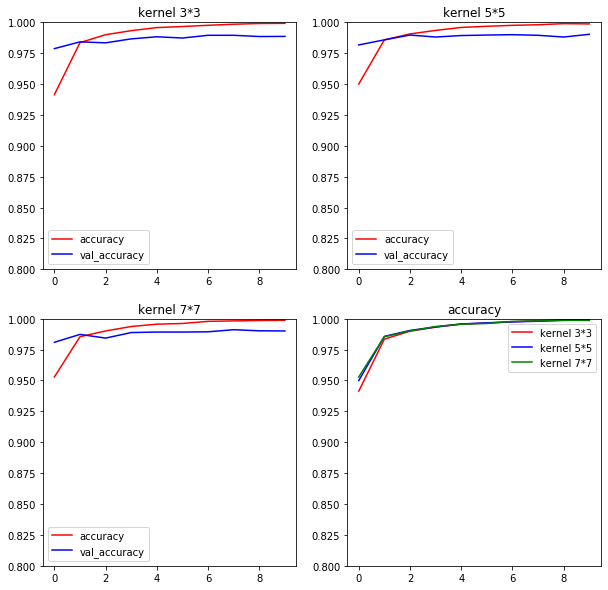

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(10,10))

axes[0][0].set_title("kernel 3*3")
axes[0][0].plot(H1.history['accuracy'],'r',label='accuracy')
axes[0][0].plot(H1.history['val_accuracy'],'b',label='val_accuracy')
axes[0][0].legend()
axes[0][0].set_ylim([0.8,1])

axes[0][1].set_title("kernel 5*5")
axes[0][1].plot(H2.history['accuracy'],'r',label='accuracy')
axes[0][1].plot(H2.history['val_accuracy'],'b',label='val_accuracy')
axes[0][1].legend()
axes[0][1].set_ylim([0.8,1])


axes[1][0].set_title("kernel 7*7")
axes[1][0].plot(H3.history['accuracy'],'r',label='accuracy')
axes[1][0].plot(H3.history['val_accuracy'],'b',label='val_accuracy')
axes[1][0].legend()
axes[1][0].set_ylim([0.8,1])


axes[1][1].set_title("accuracy")
axes[1][1].plot(H1.history['accuracy'],'r',label='kernel 3*3')
axes[1][1].plot(H2.history['accuracy'],'b',label='kernel 5*5')
axes[1][1].plot(H3.history['accuracy'],'g',label='kernel 7*7')
axes[1][1].set_ylim([0.8,1])


axes[1][1].legend()

In [ ]:
print("kernel size: 3*3, accuracy: {:f}, val_accuracy:{:f}".format(H1.history['accuracy'][-1],H1.history['val_accuracy'][-1]))
print("kernel size: 5*5, accuracy: {:f}, val_accuracy:{:f}".format(H2.history['accuracy'][-1],H2.history['val_accuracy'][-1]))
print("kernel size: 7*7, accuracy: {:f}, val_accuracy:{:f}".format(H3.history['accuracy'][-1],H3.history['val_accuracy'][-1]))

kernel size: 3*3, accuracy: 0.999080, val_accuracy:0.988500
kernel size: 5*5, accuracy: 0.998620, val_accuracy:0.990200
kernel size: 7*7, accuracy: 0.998740, val_accuracy:0.990100


### 3.4 Chỉnh số kernels

In [ ]:
# 32, 64, kernel_size=5
model_1=Model_CNN(input_shape,0.1,'sgd',[[32,5],[64,5]]).model

# 64,64, kernel_size=5
model_2=Model_CNN(input_shape,0.1,'sgd',[[64,5],[64,5]]).model

# 64, 128, kernel_size=5
model_3=Model_CNN(input_shape,0.1,'sgd',[[64,5],[128,5]]).model




In [ ]:
H1=model_1.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1635 - accuracy: 0.9501 - val_loss: 0.0600 - val_accuracy: 0.9804
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0584 - val_accuracy: 0.9836
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.0479 - val_accuracy: 0.9861
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0459 - val_accuracy: 0.9881
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0429 - val_accuracy: 0.9884
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0458 - val_accuracy: 0.9883
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0536 - val_ac

In [ ]:
H2=model_2.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1524 - accuracy: 0.9514 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0548 - val_accuracy: 0.9846
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0511 - val_accuracy: 0.9843
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0419 - val_accuracy: 0.9886
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0489 - val_accuracy: 0.9884
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0473 - val_accuracy: 0.9879
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0442 - val_ac

In [ ]:
H3=model_3.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1573 - accuracy: 0.9518 - val_loss: 0.0564 - val_accuracy: 0.9839
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0471 - val_accuracy: 0.9876
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0445 - val_accuracy: 0.9878
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0416 - val_accuracy: 0.9899
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0490 - val_accuracy: 0.9883
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0436 -

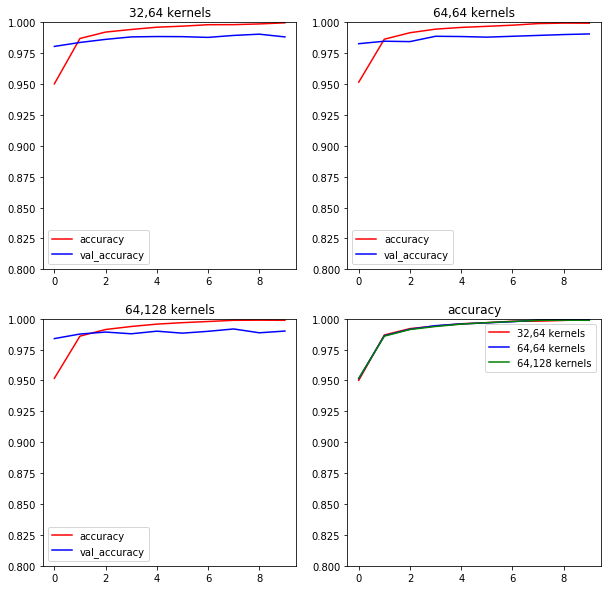

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(10,10))

axes[0][0].set_title("32,64 kernels")
axes[0][0].plot(H1.history['accuracy'],'r',label='accuracy')
axes[0][0].plot(H1.history['val_accuracy'],'b',label='val_accuracy')
axes[0][0].legend()
axes[0][0].set_ylim([0.8,1])

axes[0][1].set_title("64,64 kernels")
axes[0][1].plot(H2.history['accuracy'],'r',label='accuracy')
axes[0][1].plot(H2.history['val_accuracy'],'b',label='val_accuracy')
axes[0][1].legend()
axes[0][1].set_ylim([0.8,1])


axes[1][0].set_title("64,128 kernels")
axes[1][0].plot(H3.history['accuracy'],'r',label='accuracy')
axes[1][0].plot(H3.history['val_accuracy'],'b',label='val_accuracy')
axes[1][0].legend()
axes[1][0].set_ylim([0.8,1])


axes[1][1].set_title("accuracy")
axes[1][1].plot(H1.history['accuracy'],'r',label='32,64 kernels')
axes[1][1].plot(H2.history['accuracy'],'b',label='64,64 kernels')
axes[1][1].plot(H3.history['accuracy'],'g',label='64,128 kernels')
axes[1][1].set_ylim([0.8,1])


axes[1][1].legend()

In [ ]:
print("32,64 kernels, accuracy: {:f}, val_accuracy:{:f}".format(H1.history['accuracy'][-1],H1.history['val_accuracy'][-1]))
print("64,64 kernels, accuracy: {:f}, val_accuracy:{:f}".format(H2.history['accuracy'][-1],H2.history['val_accuracy'][-1]))
print("64,128 kernels, accuracy: {:f}, val_accuracy:{:f}".format(H3.history['accuracy'][-1],H3.history['val_accuracy'][-1]))

32,64 kernels, accuracy: 0.999500, val_accuracy:0.988100
64,64 kernels, accuracy: 0.999200, val_accuracy:0.990500
64,128 kernels, accuracy: 0.998700, val_accuracy:0.990000


## 4. Build model VGG16 cho cifar10

In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
import tensorflow

In [2]:
def VGG_16(input_shape,weight_decay=0.0005):
    model = Sequential()
    model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu',input_shape=input_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    
    
    model.add(Conv2D(128,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(128,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    
    model.add(Conv2D(256,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(256,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(256,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    
    model.add(Conv2D(512,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(512,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(512,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    
    model.add(Conv2D(512,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(512,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(512,kernel_size=3,padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 25s 0us/step


In [4]:
#normalize
X_train=(X_train/255.).astype('float32')
X_test=(X_test/255.).astype('float32')


In [5]:
input_shape=X_train[0].shape

In [6]:
input_shape

(32, 32, 3)

In [7]:
model=VGG_16(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       5

In [8]:
batch_size=256
maxepoches = 24
learning_rate = 0.001
lr_decay = 1e-6
lr_drop = 8

In [9]:
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr =tensorflow.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [10]:
adam = tensorflow.keras.optimizers.Adam(lr=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=maxepoches,callbacks=[reduce_lr],validation_data=(X_test,y_test))

Epoch 1/24
196/196 [==============================] - 14s 72ms/step - loss: 3.8419 - accuracy: 0.3297 - val_loss: 4.9759 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/24
196/196 [==============================] - 13s 66ms/step - loss: 2.8420 - accuracy: 0.5484 - val_loss: 3.5038 - val_accuracy: 0.2860 - lr: 0.0010
Epoch 3/24
196/196 [==============================] - 13s 67ms/step - loss: 2.1765 - accuracy: 0.6671 - val_loss: 2.2955 - val_accuracy: 0.5806 - lr: 0.0010
Epoch 4/24
196/196 [==============================] - 13s 67ms/step - loss: 1.7484 - accuracy: 0.7334 - val_loss: 1.8018 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 5/24
196/196 [==============================] - 13s 67ms/step - loss: 1.4742 - accuracy: 0.7718 - val_loss: 1.6008 - val_accuracy: 0.7112 - lr: 0.0010
Epoch 6/24
196/196 [==============================] - 13s 66ms/step - loss: 1.2971 - accuracy: 0.7999 - val_loss: 1.6180 - val_accuracy: 0.6916 - lr: 0.0010
Epoch 7/24
196/196 [==============================] - 13s 